In [9]:
from fonctions import *

In [27]:
# récupération des articles et des tags

dic = lire_json("articlesTags_Stanford.json")

new_dic = reorganiser_POS(dic)

# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

# Vectorisation des documents et création du model

ngram_min, ngram_max = 4, 4

X, V = creer_X(liste_tags, ngram_min, ngram_max)

In [28]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import operator

In [30]:
# calcul de la distance entre les vecteurs de chaque clusters
# 2 mesures : distortion et inertie
# voir : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

distortions = [] 
inertias = []  
K = range(1, 10)

for k in K: 
    print("%s clusters" % k)
    kmeanModel = creer_model_KM(k, X)
    
    predictions = kmeanModel.predict(X)
    
    dic_eff = effectifs_clusters(kmeanModel)
    d = calcul_cluster_heterogeneity(kmeanModel, X, predictions)
    for k, v in d.items():
        print(k, v)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                    'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_)
    print("-"*10)

1 clusters
0 {'nb_docs': 5685, 'distance': 0.9600357848274532}
----------
2 clusters
0 {'nb_docs': 811, 'distance': 0.8806302372637506}
1 {'nb_docs': 4874, 'distance': 0.9599709194065248}
----------
3 clusters
1 {'nb_docs': 483, 'distance': 0.8430992993567101}
0 {'nb_docs': 4593, 'distance': 0.9585917206764967}
2 {'nb_docs': 609, 'distance': 0.8872350623713373}
----------
4 clusters
2 {'nb_docs': 663, 'distance': 0.8726744533021418}
0 {'nb_docs': 4300, 'distance': 0.9575617668818911}
3 {'nb_docs': 400, 'distance': 0.8607041613049469}
1 {'nb_docs': 322, 'distance': 0.8477068652888247}
----------
5 clusters
4 {'nb_docs': 597, 'distance': 0.8644498649320821}
0 {'nb_docs': 4204, 'distance': 0.9569217267614438}
1 {'nb_docs': 167, 'distance': 0.7585465445686888}
2 {'nb_docs': 392, 'distance': 0.8588117993922598}
3 {'nb_docs': 325, 'distance': 0.8508732847127161}
----------
6 clusters
4 {'nb_docs': 549, 'distance': 0.8607860804327147}
1 {'nb_docs': 613, 'distance': 0.9181594772295755}
0 {'nb_

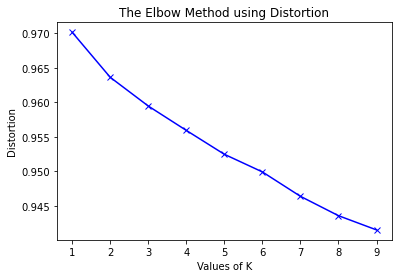

In [31]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

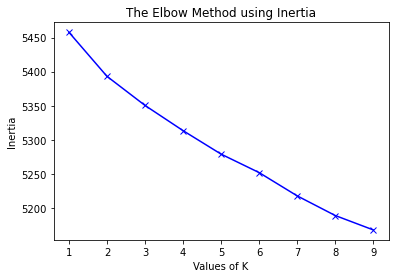

In [32]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()